In [4]:
import pandas as pd
import numpy as np
import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import math
import seaborn as sns
import itertools

In [42]:
def sens_and_spec(df):
    sensitivity = df['truepos'] / (df['truepos'] + df['falseneg'])
    specificity = df['trueneg'] / (df['trueneg'] + df['falsepos'])
    
    sensitivity[np.isnan(sensitivity)] = 0
    specificity[np.isnan(specificity)] = 0
    return(sensitivity, specificity)

def wish_mean(df):
    df = df.drop(columns = ['model_count'])
    df = df.rename(columns={'alpha': 'sig_level', 'linear': 'linearity'})
    df_mean = df.groupby(['linearity','sig_level','b','d','n_samples']).mean()
    df_mean.insert(2, 'acc_std', df.groupby(['linearity','sig_level','b','d','n_samples'])[['accuracy']].std())
    df_mean = df_mean.reset_index()
    return(df_mean)

In [43]:
results_1 = pd.read_csv('wishart_experiment_1_results.csv')
results_3 = pd.read_csv('wishart_experiment_3_results.csv')
results_cross = pd.read_csv('wishart_experiment_cross_construct_impure_results.csv')
results_intra = pd.read_csv('wishart_experiment_intra_construct_impure_results.csv')
results_latent = pd.read_csv('wishart_experiment_latent_measure_impure_results.csv')

In [44]:
results_1_mean = wish_mean(results_1)

sensitivity_1, specificity_1 = sens_and_spec(results_1_mean)

results_3_mean = wish_mean(results_3)

sensitivity_3, specificity_3 = sens_and_spec(results_3_mean)

results_cross_mean = wish_mean(results_cross)

sensitivity_cross, specificity_cross = sens_and_spec(results_cross_mean)

results_intra_mean = wish_mean(results_intra)

sensitivity_intra, specificity_intra = sens_and_spec(results_intra_mean)

results_latent_mean = wish_mean(results_latent)

sensitivity_latent, specificity_latent = sens_and_spec(results_latent_mean)

In [45]:
results_cross_mean

,linearity,sig_level,b,d,n_samples,accuracy,trueneg,acc_std,falseneg,truepos,falsepos
0,False,0.001,0.1,0.1,50,0.003333,0.01,0.033333,0.0,0.0,2.99
1,False,0.001,0.1,0.1,100,0.020000,0.06,0.079561,0.0,0.0,2.94
2,False,0.001,0.1,0.1,500,0.203333,0.61,0.263342,0.0,0.0,2.39
3,False,0.001,0.1,0.1,1000,0.406667,1.22,0.278605,0.0,0.0,1.78
4,False,0.005,0.1,0.1,50,0.010000,0.03,0.057149,0.0,0.0,2.97
5,False,0.005,0.1,0.1,100,0.040000,0.12,0.127833,0.0,0.0,2.88
6,False,0.005,0.1,0.1,500,0.270000,0.81,0.283061,0.0,0.0,2.19
7,False,0.005,0.1,0.1,1000,0.503333,1.51,0.274199,0.0,0.0,1.49
8,False,0.010,0.1,0.1,50,0.010000,0.03,0.057149,0.0,0.0,2.97
9,False,0.010,0.1,0.1,100,0.060000,0.18,0.145103,0.0,0.0,2.82


In [46]:
results_intra_mean

,linearity,sig_level,b,d,n_samples,accuracy,trueneg,acc_std,falseneg,truepos,falsepos
0,False,0.001,0.1,0.1,50,0.333333,0.00,0.000000,0.00,1.00,2.00
1,False,0.001,0.1,0.1,100,0.336667,0.01,0.033333,0.00,1.00,1.99
2,False,0.001,0.1,0.1,500,0.626667,0.91,0.308066,0.03,0.97,1.09
3,False,0.001,0.1,0.1,1000,0.806667,1.47,0.296557,0.05,0.95,0.53
4,False,0.005,0.1,0.1,50,0.333333,0.00,0.000000,0.00,1.00,2.00
5,False,0.005,0.1,0.1,100,0.366667,0.10,0.138129,0.00,1.00,1.90
6,False,0.005,0.1,0.1,500,0.716667,1.20,0.312030,0.05,0.95,0.80
7,False,0.005,0.1,0.1,1000,0.846667,1.60,0.256979,0.06,0.94,0.40
8,False,0.010,0.1,0.1,50,0.330000,0.00,0.033333,0.01,0.99,2.00
9,False,0.010,0.1,0.1,100,0.393333,0.19,0.197515,0.01,0.99,1.81


In [47]:
results_latent_mean

,linearity,sig_level,b,d,n_samples,accuracy,trueneg,acc_std,falseneg,truepos,falsepos
0,False,0.001,0.1,0.1,50,0.334667,0.02,0.013333,0.00,5.00,9.98
1,False,0.001,0.1,0.1,100,0.352000,0.28,0.055317,0.00,5.00,9.72
2,False,0.001,0.1,0.1,500,0.575333,3.92,0.177185,0.29,4.71,6.08
3,False,0.001,0.1,0.1,1000,0.704000,6.11,0.178614,0.55,4.45,3.89
4,False,0.005,0.1,0.1,50,0.342000,0.14,0.033708,0.01,4.99,9.86
5,False,0.005,0.1,0.1,100,0.372000,0.60,0.086938,0.02,4.98,9.40
6,False,0.005,0.1,0.1,500,0.633333,4.89,0.191983,0.39,4.61,5.11
7,False,0.005,0.1,0.1,1000,0.746000,6.85,0.176178,0.66,4.34,3.15
8,False,0.010,0.1,0.1,50,0.347333,0.23,0.046705,0.02,4.98,9.77
9,False,0.010,0.1,0.1,100,0.395333,0.96,0.107728,0.03,4.97,9.04


In [49]:
def plot_nsamples_sns(df):
    
    fig, axs = plt.subplots(2,2, sharex=True, sharey=True, figsize=(8,8))
    #fig.subplots_adjust(hspace = 1.2, wspace=1.2)
    
    #fig.suptitle('Wishart test results on the basic graph containing 3 t-separation constraints', fontsize=12)
    
    palette = sns.color_palette("rocket", 5)

    axs = axs.ravel()

    for n, samples in enumerate(df['n_samples'].unique()):
        new_df = df[df['n_samples'] == samples]
        sens, spec = sens_and_spec(new_df)
        
        axs[n].plot([1, 0], [0, 1], linewidth=0.5)
        
        sns.scatterplot(x=spec, y=sens, ax=axs[n], hue=new_df['sig_level'],palette=palette,s=80, style=new_df['linearity'])
        axs[n].set_title('Sample size {}'.format(samples))
        axs[n].set(xlabel = 'Specificity', ylabel = 'Sensitivity')
        axs[n].set_xlim([-0.05,1.05])
        axs[n].set_ylim([-0.05,1.05])

        plt.xlabel('Specificity')
        plt.ylabel('Sensitivity')
        
plt.style.use('fivethirtyeight')

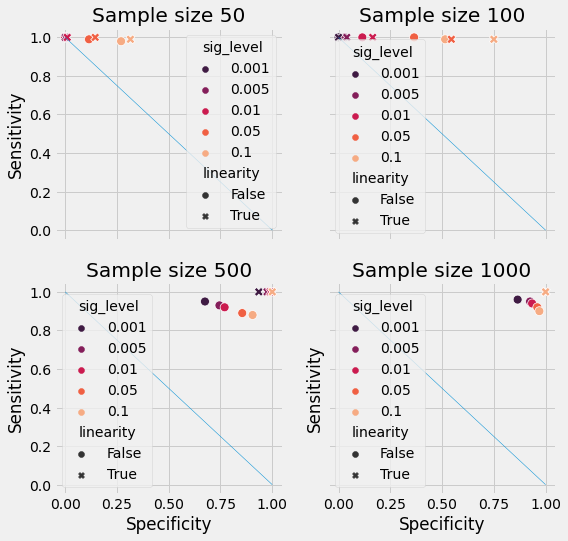

In [50]:
plot_nsamples_sns(results_1_mean)

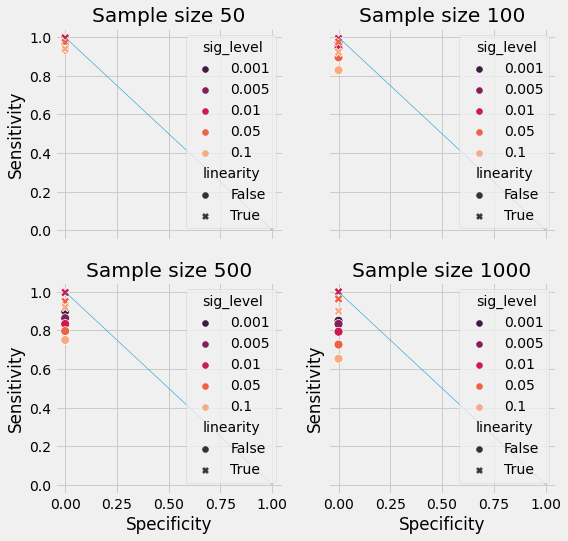

In [51]:
plot_nsamples_sns(results_3_mean)

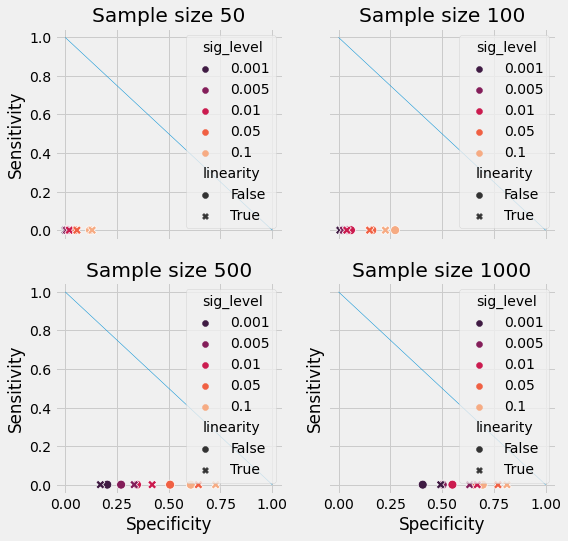

In [52]:
plot_nsamples_sns(results_cross_mean)

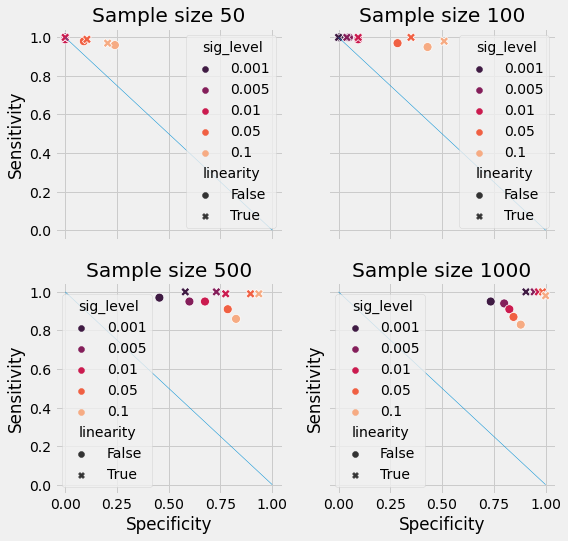

In [53]:
plot_nsamples_sns(results_intra_mean)

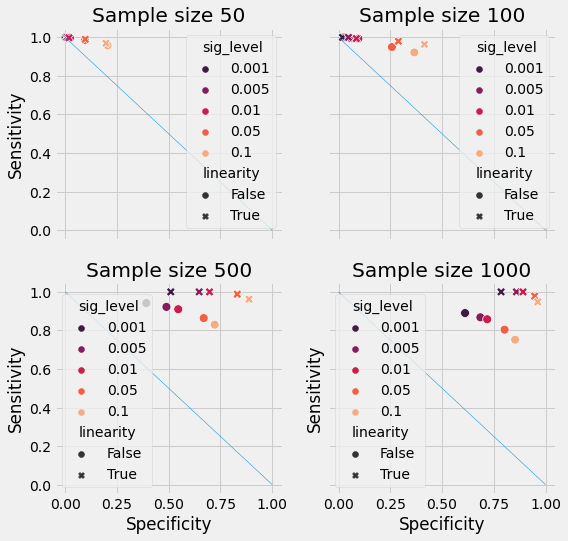

In [54]:
plot_nsamples_sns(results_latent_mean)

# Large graph